## Start

In [11]:
# Load dependencies

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
from sklearn.decomposition import NMF
from sklearn.cluster import DBSCAN
from scipy.spatial import ConvexHull
import mpld3
from adjustText import adjust_text
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10
from bokeh.models import Label, LabelSet
import nltk
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from afinn import Afinn
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime
import plotly.express as px

In [12]:
# Load datasets

df_2018 = pd.read_csv('/Users/annadeniz/Downloads/news_2018.csv')

df_2022 = pd.read_csv('/Users/annadeniz/Downloads/news_2022.csv')

In [13]:
df_2018.head()

,stories_id,publish_date,title,url,language,ap_syndicated,themes,media_id,media_name,media_url
0,1009123114,2018-10-01 14:31:06,Orange County football rushing leaders after W...,https://www.ocregister.com/2018/10/01/orange-c...,NaN,False,NaN,659381,Coast Magazine,http://www.coastmagazine.com/
1,1007852321,2018-10-01 00:11:02,Former Ivory Coast leader Gbagbo begins freedo...,https://www.france24.com/en/20181001-former-iv...,en,False,NaN,40606,france24-en,http://www.france24.com/en/
2,1010268876,2018-10-03 00:00:00,Bolsonaro obtém ligeira vantagem nas sondagens,http://jornaldeangola.sapo.ao/mundo/bolsonaro_...,pt,False,NaN,659603,El Hispano - United States - Missouri,http://www.elhispanostl.com/
3,1007891510,2018-10-01 02:55:00,Why Brazil's business elites are warming to a ...,https://article.wn.com/view/2018/10/01/Why_Bra...,en,False,NaN,95973,WorldNews.com,http://wn.com/#spider
4,1010700420,2018-10-03 11:11:56,Umstrittener Kandidat Bolsonaro: Brasiliens Fr...,http://www.spiegel.de/politik/ausland/jair-bol...,de,False,NaN,300537,International - SPIEGEL ONLINE,http://www.spiegel.de/international/


In [14]:
# Join data sets and transform date 

df_2018['year'] = '2018'

df_2022['year'] = '2022'

df = pd.concat([df_2018, df_2022])

df = df.drop_duplicates(subset=["title"], keep=False)

df = df[df["language"] == 'en'].reset_index(drop=True)

df['publish_date'] = pd.to_datetime(df.publish_date, infer_datetime_format=True)

df.head()

,stories_id,publish_date,title,url,language,ap_syndicated,themes,media_id,media_name,media_url,year
0,1007852321,2018-10-01 00:11:02,Former Ivory Coast leader Gbagbo begins freedo...,https://www.france24.com/en/20181001-former-iv...,en,False,NaN,40606,france24-en,http://www.france24.com/en/,2018
1,1007891510,2018-10-01 02:55:00,Why Brazil's business elites are warming to a ...,https://article.wn.com/view/2018/10/01/Why_Bra...,en,False,NaN,95973,WorldNews.com,http://wn.com/#spider,2018
2,1008053027,2018-10-01 06:40:50,Monday US briefing: Kavanaugh investigation go...,https://www.theguardian.com/us-news/2018/oct/0...,en,False,NaN,623382,Guardian,http://www.theguardian.com/us,2018
3,1008079371,2018-10-01 07:13:00,How to Tackle Malnutrition In Africa By Encour...,https://www.forbes.com/sites/mfonobongnsehe/20...,en,False,NaN,1104,Forbes,http://www.forbes.com/,2018
4,1008153230,2018-10-01 00:00:00,The Decline and Fall of Brazil’s Political Est...,https://www.foreignaffairs.com/articles/brazil...,en,False,NaN,46603,Foreign Affairs,http://m.foreignaffairs.com/#spider,2018


In [17]:
def lemma_tokenizer(str_input):
    default_tokenizer = CountVectorizer().build_tokenizer()
    tokens = default_tokenizer(str_input)
    #stopwords.extend(['luiz','inácio','da','silva','lula','new','news','say','jair','bolsonaro','president','brazil','election','brazilian','presidency','presidential','ap','edt','est','oct','ibd','u'])
    tokens = [WordNetLemmatizer().lemmatize(token) for token in tokens]
    return tokens

import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

vec = CountVectorizer()

X = vec.fit_transform(df.title)

dfm = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out(), index=df.index)

dfm

,00,000,01,02,03,032,038,039,04,05,...,zitouna,ziv,zloty,zoe,zone,ádaalnéhígíí,át,ávila,étienne,ílįįgo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Create topic model

In [18]:
# Create a topic model using data

nmf = NMF(5,random_state=42)
W = nmf.fit_transform(dfm)

In [19]:
# Get words and corresponding weights resulting from the topic model in a table

def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    
    return pd.DataFrame(topic_dict)

In [20]:
# Get name of each title: augment the number of words per topic and base it on the results 

no_top_words = 15

display_topics(nmf, vec.get_feature_names_out(), no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights
0,brazil,6.0,the,5.2,to,5.7,at,2.7,in,5.6
1,bolsonaro,4.1,of,1.8,lula,0.3,news,2.5,lula,0.7
2,election,1.8,and,0.9,trump,0.2,ap,2.2,and,0.5
3,lula,1.4,for,0.7,brazil,0.2,summary,2.2,brazil,0.3
4,right,1.0,is,0.6,know,0.2,edt,2.0,election,0.3
5,presidential,0.9,world,0.5,as,0.2,11,0.4,brazilian,0.3
6,far,0.8,amazon,0.4,it,0.2,12,0.3,presidential,0.3
7,of,0.8,on,0.4,president,0.2,10,0.3,vote,0.2
8,for,0.7,trump,0.4,win,0.2,est,0.2,for,0.2
9,jair,0.7,new,0.2,from,0.2,17,0.1,silva,0.2


In [21]:
# Title dictionary

topics={0:"Far right", 1: "Donald Trump", 2: "Emerging stock markets", 3: "Election results", 4:"World climate"}

In [22]:
# Create df with topics

df_w = pd.DataFrame(W)

df_w.head()

,0,1,2,3,4
0,0.002759,0.002458,0.000323,0.000271,0.003435
1,0.131057,0.023795,0.175554,0.000000,0.000000
2,0.007763,0.008622,0.005471,0.001192,0.000000
3,0.000000,0.000000,0.169271,0.000000,0.168502
4,0.094302,0.231837,0.000000,0.000000,0.007236


In [23]:
# Merge df with topics df

topics_df = pd.concat([df,df_w], axis=1)

topics_df.head()

,stories_id,publish_date,title,url,language,ap_syndicated,themes,media_id,media_name,media_url,year,0,1,2,3,4
0,1007852321,2018-10-01 00:11:02,Former Ivory Coast leader Gbagbo begins freedo...,https://www.france24.com/en/20181001-former-iv...,en,False,NaN,40606,france24-en,http://www.france24.com/en/,2018,0.002759,0.002458,0.000323,0.000271,0.003435
1,1007891510,2018-10-01 02:55:00,Why Brazil's business elites are warming to a ...,https://article.wn.com/view/2018/10/01/Why_Bra...,en,False,NaN,95973,WorldNews.com,http://wn.com/#spider,2018,0.131057,0.023795,0.175554,0.000000,0.000000
2,1008053027,2018-10-01 06:40:50,Monday US briefing: Kavanaugh investigation go...,https://www.theguardian.com/us-news/2018/oct/0...,en,False,NaN,623382,Guardian,http://www.theguardian.com/us,2018,0.007763,0.008622,0.005471,0.001192,0.000000
3,1008079371,2018-10-01 07:13:00,How to Tackle Malnutrition In Africa By Encour...,https://www.forbes.com/sites/mfonobongnsehe/20...,en,False,NaN,1104,Forbes,http://www.forbes.com/,2018,0.000000,0.000000,0.169271,0.000000,0.168502
4,1008153230,2018-10-01 00:00:00,The Decline and Fall of Brazil’s Political Est...,https://www.foreignaffairs.com/articles/brazil...,en,False,NaN,46603,Foreign Affairs,http://m.foreignaffairs.com/#spider,2018,0.094302,0.231837,0.000000,0.000000,0.007236


## Sentiments

In [24]:
# Create df with sentiments

analyzer = SentimentIntensityAnalyzer()

results = [analyzer.polarity_scores(x) for x in df["title"]]
sentiment = pd.DataFrame.from_dict(results)

sentiment.head()

,neg,neu,pos,compound
0,0.0,0.682,0.318,0.6369
1,0.0,0.873,0.127,0.1531
2,0.0,1.000,0.000,0.0000
3,0.0,0.746,0.254,0.5267
4,0.0,1.000,0.000,0.0000


In [25]:
# Merge topic df with sentiments df

sentiment_df = pd.concat([topics_df,sentiment], axis=1)

sentiment_df.head()

,stories_id,publish_date,title,url,language,ap_syndicated,themes,media_id,media_name,media_url,year,0,1,2,3,4,neg,neu,pos,compound
0,1007852321,2018-10-01 00:11:02,Former Ivory Coast leader Gbagbo begins freedo...,https://www.france24.com/en/20181001-former-iv...,en,False,NaN,40606,france24-en,http://www.france24.com/en/,2018,0.002759,0.002458,0.000323,0.000271,0.003435,0.0,0.682,0.318,0.6369
1,1007891510,2018-10-01 02:55:00,Why Brazil's business elites are warming to a ...,https://article.wn.com/view/2018/10/01/Why_Bra...,en,False,NaN,95973,WorldNews.com,http://wn.com/#spider,2018,0.131057,0.023795,0.175554,0.000000,0.000000,0.0,0.873,0.127,0.1531
2,1008053027,2018-10-01 06:40:50,Monday US briefing: Kavanaugh investigation go...,https://www.theguardian.com/us-news/2018/oct/0...,en,False,NaN,623382,Guardian,http://www.theguardian.com/us,2018,0.007763,0.008622,0.005471,0.001192,0.000000,0.0,1.000,0.000,0.0000
3,1008079371,2018-10-01 07:13:00,How to Tackle Malnutrition In Africa By Encour...,https://www.forbes.com/sites/mfonobongnsehe/20...,en,False,NaN,1104,Forbes,http://www.forbes.com/,2018,0.000000,0.000000,0.169271,0.000000,0.168502,0.0,0.746,0.254,0.5267
4,1008153230,2018-10-01 00:00:00,The Decline and Fall of Brazil’s Political Est...,https://www.foreignaffairs.com/articles/brazil...,en,False,NaN,46603,Foreign Affairs,http://m.foreignaffairs.com/#spider,2018,0.094302,0.231837,0.000000,0.000000,0.007236,0.0,1.000,0.000,0.0000


In [26]:
# Headlines with lowest sentiment

sentiment_df.sort_values("compound").head()[["title","compound"]].values

array([["STOP The WARS! Paris Protests Trump & Macron's War Crimes On Armistice Day 2018",
        -0.924],
       ["The 'Brazilian Donald Trump' just became president in a landslide. He got there despite saying he couldn't love a gay son and that a colleague was too 'ugly' to be raped.",
        -0.9056],
       ['CCTV shows moments before fatal bridge collapse in India, killing more than 100',
        -0.9022],
       ['LETTERS - It’s right to challenge racist lies over child sexual abuse',
        -0.8934],
       ["'Flowering of hate': bitter election brings wave of political violence to Brazil",
        -0.891]], dtype=object)

In [27]:
# Headlines with higher sentiment

sentiment_df.sort_values("compound", ascending=False).head()[["title","compound"]].values

array([['VINDICATED: Lula supporters celebrate in Autazes, Amazonas State',
        0.8788],
       ['Día de los Muertos celebrations help families honor, remember deceased loved ones',
        0.8689],
       ['Holiday Gift Guide 2022 • House Beautiful', 0.8591],
       ['Somerset ready to accept MassWorks grant to improve Route 6',
        0.8591],
       ["Brazil's Comedians See Perfect Timing 'To Make People Laugh'",
        0.8591]], dtype=object)

## Visualisations

In [28]:
# Headlines per election year

df_years = df.groupby("year")["title"].count().reset_index()

fig = px.bar(df_years, x="year", y="title", color="year", title="Headlines per election year")

fig.show()

In [29]:
# Top sources of media coverage

df_media = df.groupby("media_name")["title"].count().reset_index()

df_media = df_media.sort_values("title", ascending=False).reset_index().head(10)

fig = px.bar(df_media, x="media_name", y="title", color="media_name", title="Headlines per top media")

fig.show()

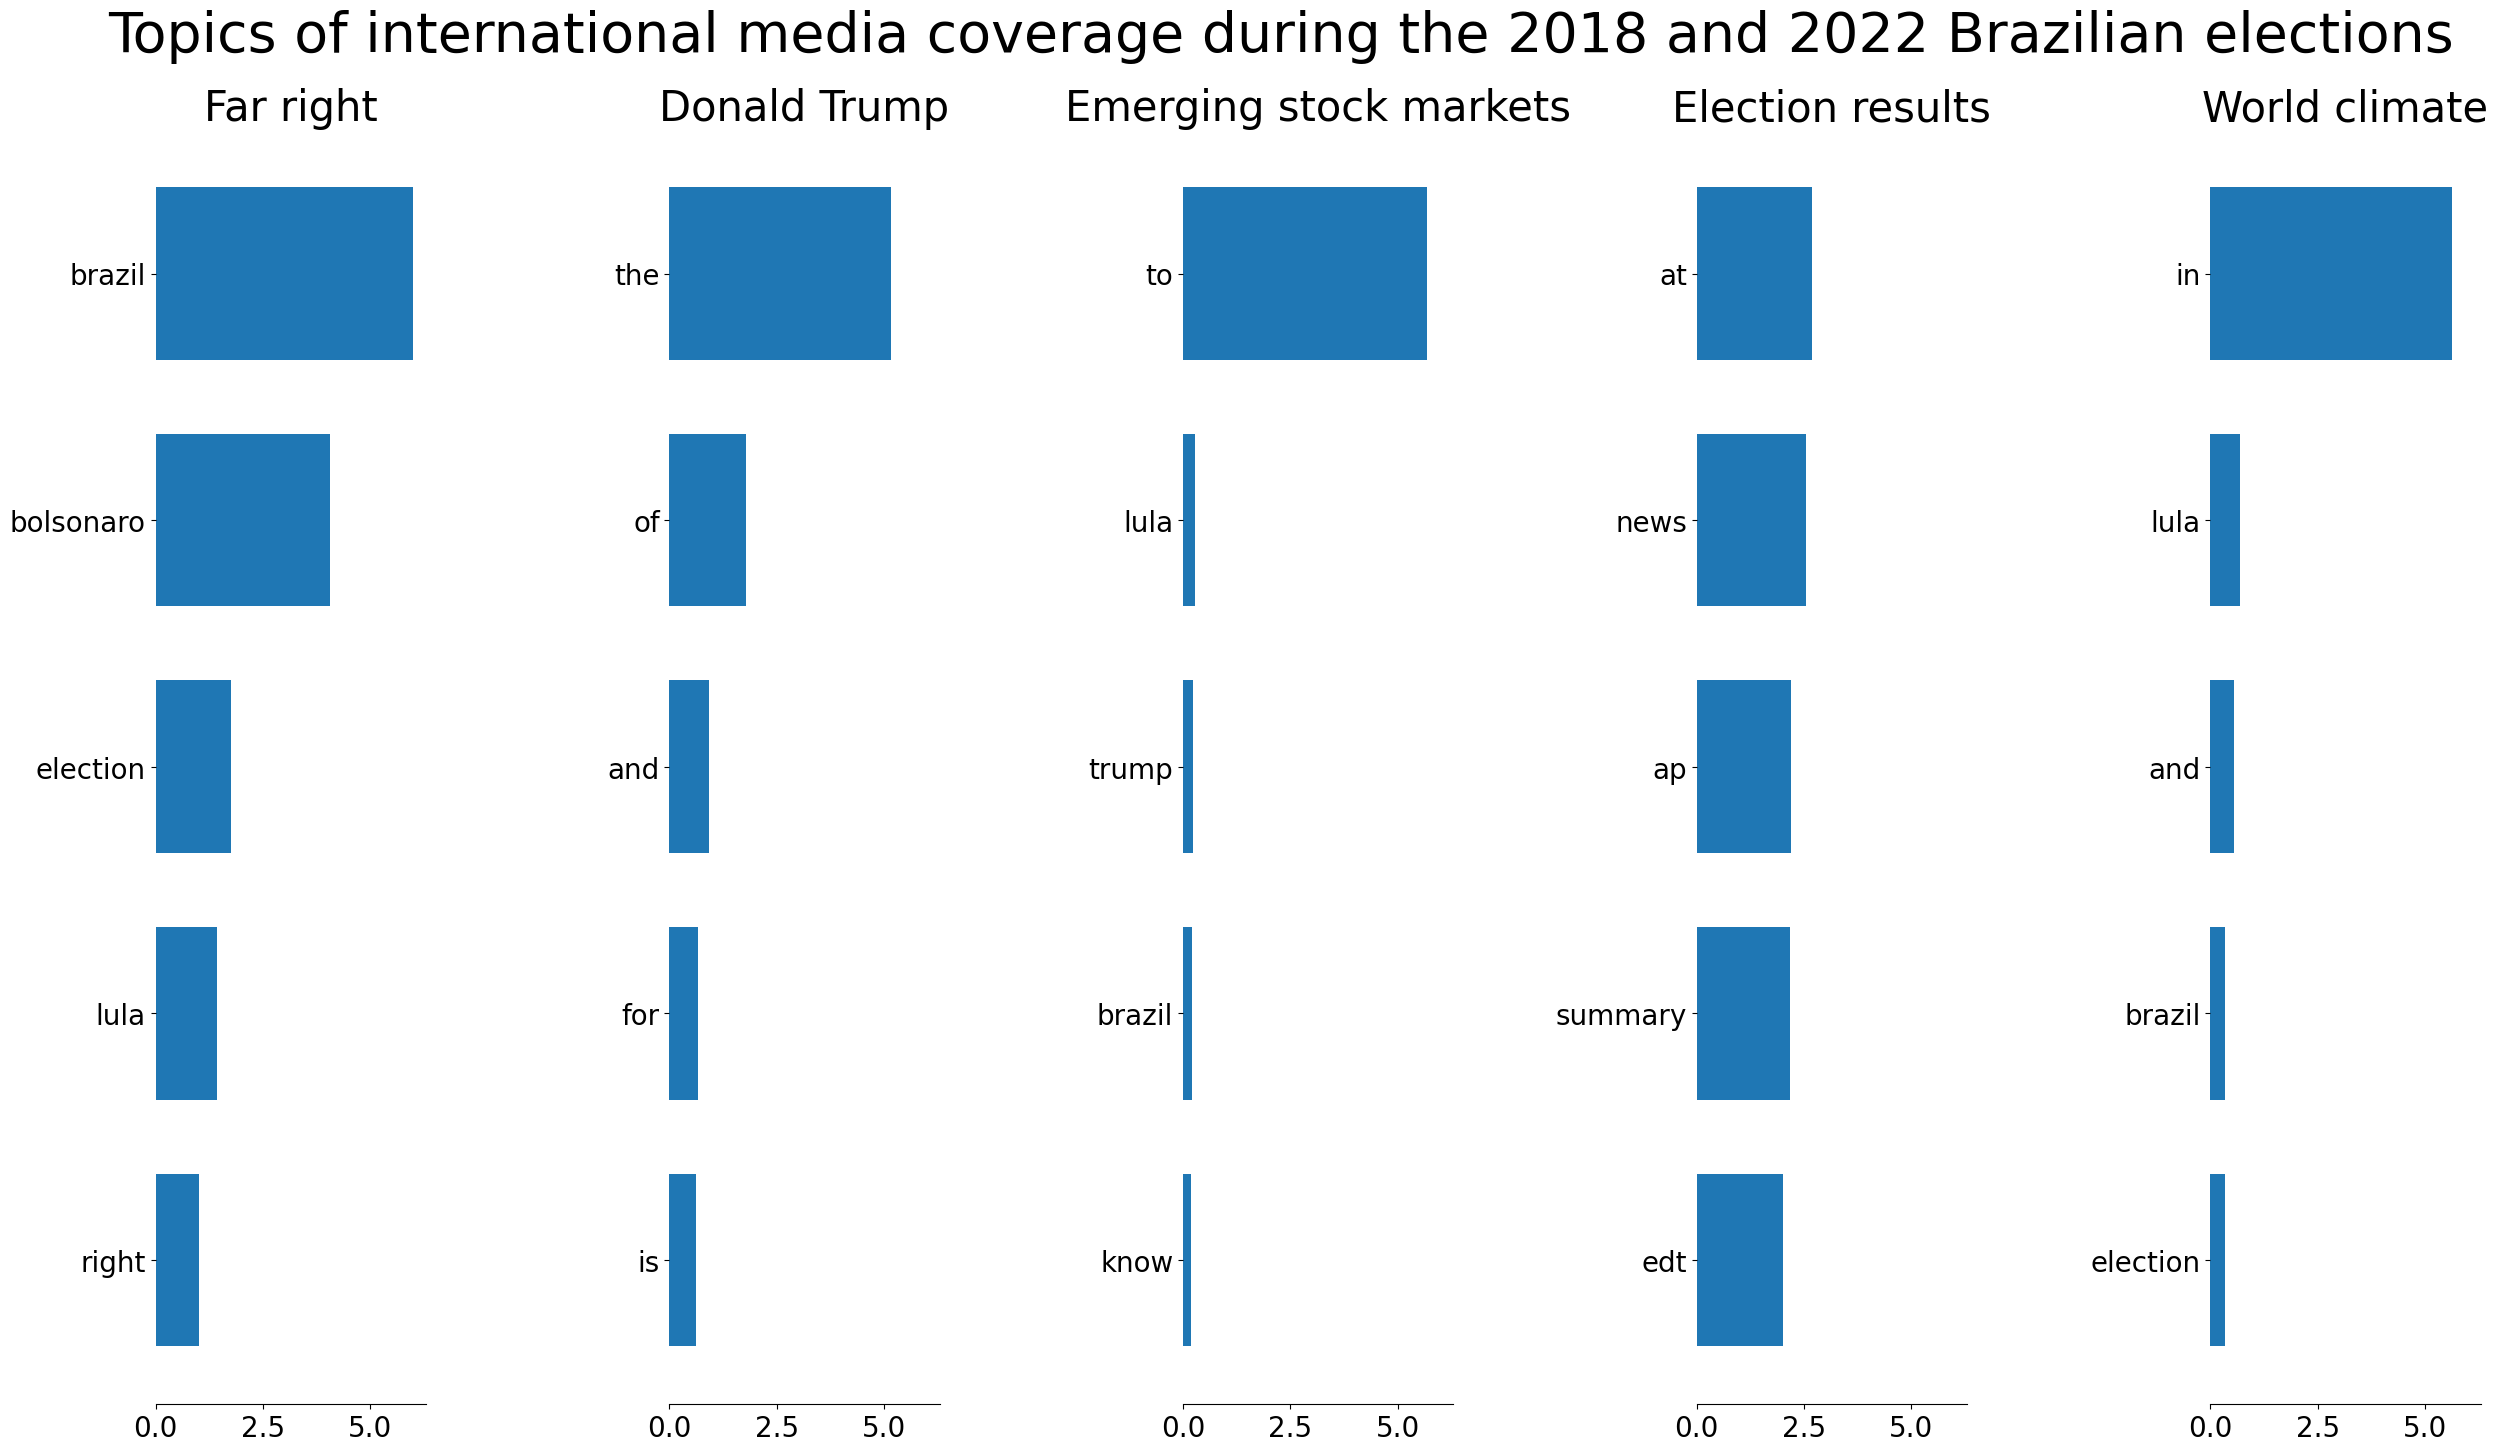

In [30]:
# Describing the topic model

def plot_top_words(model, feature_names, n_top_words, title):
    n_components = model.n_components_
    fig, axes = plt.subplots(n_components//5,5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    t_titles = []
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"{topics[topic_idx]}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
        
        t_titles.append(", ".join(top_features[:3]))

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
    return t_titles

t_titles = plot_top_words(nmf, vec.get_feature_names_out(), 5, "Topics of international media coverage during the 2018 and 2022 Brazilian elections")

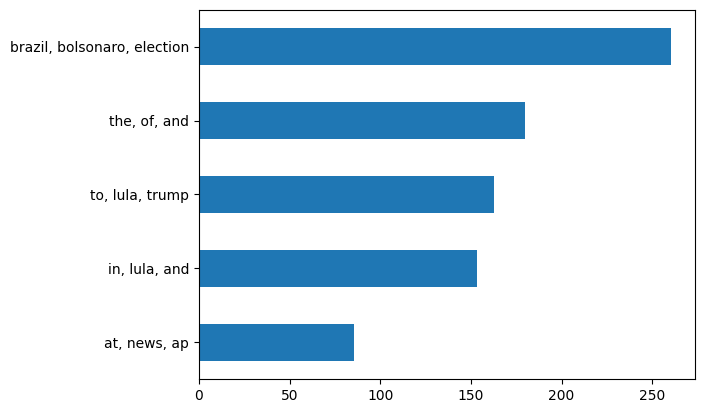

In [31]:
# Top words per topic

total_sums = W.sum(axis=0)
fig, ax = plt.subplots()

df_W = pd.DataFrame(W)
df_W.columns = t_titles
df_W.sum(axis=0).sort_values().plot.barh()

plt.savefig('/Users/annadeniz/Downloads/topics_words.png')

In [32]:
# Compare presence of topics in 2018 and 2022

import plotly

topics_df_long=pd.melt(topics_df, id_vars=['title', 'year'], value_vars=[0,1,2,3,4])

grouped_year_party=topics_df_long.groupby(['year','variable']).mean().reset_index()

grouped_year_party=grouped_year_party.reset_index().rename(columns={"variable":"topic", "value": "share"})

grouped_year_party=grouped_year_party.replace(topics)

fig = px.bar(grouped_year_party, x="topic", y="share", color="year",   facet_col="year", barmode="group",
                labels=dict(variable="Share", topics="Topics"),
                title="Share of topics per election year",
                width=1400, height=800)
fig.show()

/var/folders/f9/cf4t4cbj1cb9c4pbm68p5czw0000gn/T/ipykernel_70195/464773636.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



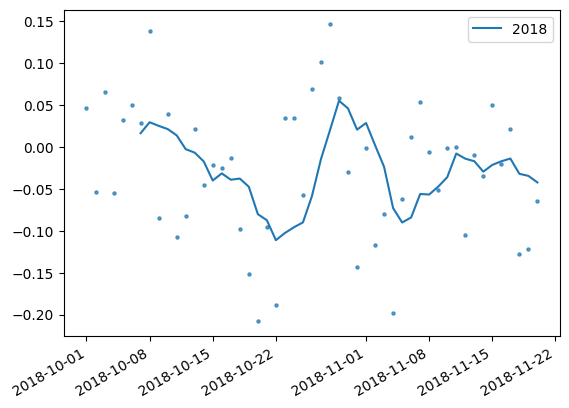

In [33]:
# Sentiment day by day in 2018

sentiment_df["date"] = pd.to_datetime(df.publish_date).dt.date
daily_sentiment = (sentiment_df
                   .groupby(["date","year"])["compound"]
                   .mean()
                   .reset_index()
                   .pivot_table(columns="year", values="compound", index="date")
                   .reset_index()
                  )

daily_sentiment["date"] = pd.to_datetime(daily_sentiment["date"])
days = pd.date_range(start="2018-10-01",end="2018-11-20")
daily_sentiment = pd.DataFrame({"date": days}).merge(daily_sentiment, how="left")

fig, ax = plt.subplots()

for year in ["2018"]:
    ax.scatter(daily_sentiment.date, daily_sentiment[year], s=5, alpha=0.7)
    x = daily_sentiment[year].rolling(7).mean()
    ax.plot(daily_sentiment.date, x, label=year)

fig.autofmt_xdate()
ax.legend()